In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

In [12]:
frac = 0.02

aglo_labels = pd.read_csv('./data/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]

radio_ref = pd.read_csv('./data/radio_ref.csv')
# radio_ref[['PROV','NOMPROV','DPTO', 'NOMDPTO']].drop_duplicates().to_csv('./data/DPTO_PROV.csv', index = False)
dpto_region = pd.read_csv('./data/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)
radio_ref = radio_ref[['RADIO_REF_ID', 'NOMDPTO','NOMPROV', 'AGLOMERADO', 'Region']].drop_duplicates().merge(aglo_labels)


data = pd.read_csv('./data/pobreza'+str(frac)+'.csv', index_col=0)
data = data.merge(radio_ref, on = ['RADIO_REF_ID', 'AGLOMERADO'])
data['AGLO_si'] = data.AGLOMERADO != 0

pob_tot = len(data)/frac

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
data.shape[0]/frac/2

43051150.0

In [24]:
len(data_tail)

172201

In [25]:
len(data)

1722046

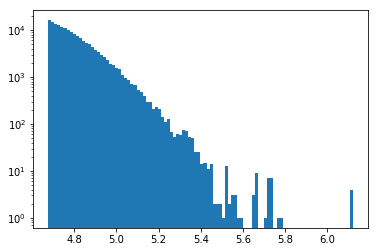

In [195]:
data_tail = data.loc[data.P47T_persona > data.P47T_persona.quantile(.90)]
plt.hist(np.log10(data_tail.P47T_persona), 100)
plt.yscale('log')
plt.show()

In [258]:
y, x = np.histogram(np.log10(data_tail.P47T_persona), 1000, density=True)
x = (x[:-1] + x[1:])/2
y = np.log10(y)

x = x[y >= 0][:-10]
y = y[y >= 0][:-10]

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
z = np.polyfit(x, y, 2)
sigma = 1/np.sqrt(-2*z[0]);
mu = -z[1]/(2*z[0]);

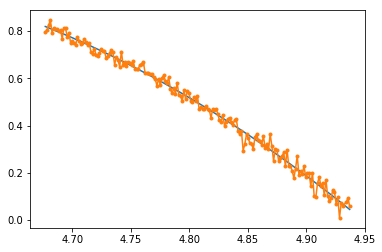

In [260]:
plt.plot(x, z[0]*x**2 + z[1]*x + z[2])
plt.plot(x, y, marker = '.')

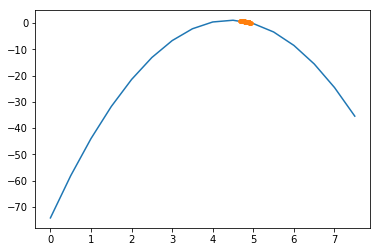

In [261]:
x_2 = np.arange(0, 8, .5)
plt.plot(x_2, z[0]*x_2**2 + z[1]*x_2 + z[2])
plt.plot(x, y, marker = '.')

In [262]:
import numpy as np
from scipy.special import erf
from scipy.stats import norm


In [263]:
N_ = (np.log10(data.P47T_persona).values > 5.2).sum()
N_

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


1184

In [264]:
threshold = 4.8

In [270]:
w = (mu - threshold)/sigma
cum_th = 1 - .5*(1 + erf(w/np.sqrt(2)))
cum_th

0.8538728179885104

In [267]:
# # From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(cum_th, 1, (1 - cum_th)/N_ ) + .5*(1 - cum_th)/N_])
# x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

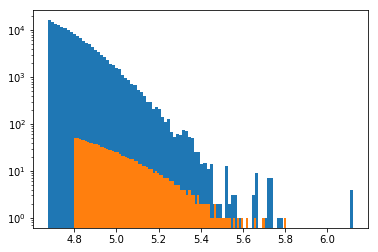

In [268]:
plt.hist(np.log10(data_tail.P47T_persona), 100)
plt.hist(x_logn_clip3, 100)

plt.yscale('log')
plt.show()

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


(4, 6)

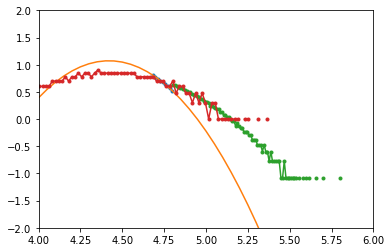

In [278]:
# data
y, x = np.histogram(np.log10(data_tail.P47T_persona), 100, density=True)
x = (x[:-1] + x[1:])/2
y = np.log10(y)

x = x[y >= 0][:-10]
y = y[y >= 0][:-10]

plt.plot(x, y, marker = '.')

# fit
x_2 = np.arange(0, 8, .05)
plt.plot(x_2, z[0]*x_2**2 + z[1]*x_2 + z[2])

# attempt
y, x = np.histogram(x_logn_clip3, 100, density=True)
x = (x[:-1] + x[1:])/2
y = np.log10(y)
plt.plot(x, y, marker = '.')

x_logn = [norm.ppf(q, mu, sigma) for q in np.arange(0, 1, .003)][1:-1]

y, x = np.histogram(x_logn, 100)
x = (x[:-1] + x[1:])/2
y = np.log10(y)
plt.plot(x, y, marker = '.')

plt.ylim(-2, 2)
plt.xlim(4, 6)